# Homework 5

## Problem 1

SQP

Note: The code produces the wrong answer because at a certain point W becomes nan and the code stops running. I suspect this is due to my QP solver. I solved the equations by hand and input them because I could not find a QP solver that would work for me. I keep having trouble with my version of python.

In [19]:
#pip install qpsolvers[open_source_solvers]

import torch as t

#Initializing x
x = t.tensor([[1.], [1.]]) # x[0] = x1 and x[1] = x2

#Initializing mu and W just to get calculation started -- calculated with initial conditions
u = t.tensor([[6.], [2.]]) # u[0] = u1 and u[1] = u2
W = t.tensor([[2., 0.], [0., (2 + 2*u[0] + 2*u[1])]]) 
w = t.abs(u) #inital weight for line search
alpha = 1 #initial step size

#Calculating Lagrange Gradient
gL = t.tensor([[2*x[0]], [2*x[1] -6]]) + t.matmul( t.tensor([[-2., 5.], [2*x[1], (2*x[1] - 2) ]])   , u  )

#While loop
e = 0.001
while t.norm(gL) > e:
    #Solve for s(k), u(k+1) using QP ************************************************************************************************************
    #I first solved the equations for the QP by hand and then put them here
    a_W = W[0,0]
    b_W = W[0,1]
    c_W = W[1,0]
    d_W = W[1,1]
    
    g = t.tensor([[(x[1]**2 - 2*x[0])], [((x[1] - 1)**2 + 5*x[0] -15)]])
    g_old = g
    A = t.tensor([[-2., 2*x[1]], [5., (2*x[1] - 2) ]])
    A_inv = t.inverse(A)
    fx = t.tensor([[2*x[0]], [(2*x[1] - 6)]])
    
    s2 = (-3.5*x[1]**2 + 7*x[1] - 5*x[0] + 14)/(7*x[1] - 2)
    s1 = 0.5*x[1]**2 - x[1] + x[1]*s2
    s = t.tensor([[s1], [s2]]) #s(k)
    
    old_u = u
    u2 = ( -c_W*s1 - d_W*s2 -2*x[1] + 6 - a_W*s1*x[1] - 2*x[0]*x[1] - b_W*x[1]*s2  )/(7*x[1] - 2)
    u1 = 0.5*a_W*s1 + 0.5*b_W*s2 + 2.5*u2 + x[0]
    u = t.tensor([[u1], [u2]]) #mu(k+1)
    
    #Line search, alpha(k), merit function and armijo line search ********************************************************************************
    w1 = t.abs(u) #weight option 1
    w2 = 0.5*w + 0.5*t.abs(u) #weight option 2
    w = t.maximum(w1, w2) #weight
    Xm = x + alpha*s
    Gm = t.tensor([[(Xm[1]**2 - 2*Xm[0])], [((Xm[1] - 1)**2 + 5*Xm[0] -15)]]) #constraints with x = x + alpha*s
    oB_fun = Xm[0]**2 + (Xm[1] - 3)**2 #objective function with x = x + alpha*s
    mF = oB_fun + w[0]*max(0, Gm[0]) + w[1]*max(0, Gm[1]) #merit function
    
    mA = t.tensor([[-2., 2*Xm[1]], [5., (2*Xm[1] - 2) ]])
    mfx = t.tensor([[2*Xm[0]], [(2*Xm[1] - 6)]])
    dg_Dalpha = t.matmul(mA, s)
    dmF = t.matmul(t.transpose(mfx, 0, 1), s) +  w[0]*max(0, dg_Dalpha[0]) + w[1]*max(0, dg_Dalpha[1]) #derivative of merit function
    phi = mF + alpha*dmF
    
    old_alpha = alpha
    if mF > phi:
        alpha_dum = alpha
        alpha = alpha_dum*0.5
    
    #x(k+1) = x(k) + alpha(k)*s(k) **************************************************************************************************************
    x_old = x
    x_dum = x + alpha*s
    x = x_dum
    g_new = t.tensor([[(x[1]**2 - 2*x[0])], [((x[1] - 1)**2 + 5*x[0] -15)]])
    
    #W(k+1), BFGS *******************************************************************************************************************************
    y = g_new - g_old
    S = x - x_old 
    W_old = W
    first_Term = t.matmul(y, t.transpose(y, 0, 1))/t.matmul(t.transpose(y, 0, 1),S)
    second_Term = t.matmul(t.matmul(t.matmul(W_old, S), t.transpose(S, 0, 1)), W_old)
    sec_dev = t.matmul(t.matmul(t.transpose(S, 0, 1), W_old),S)
    two = (second_Term/sec_dev)
    W = W_old + first_Term - two  
    
    #Calculate Lagrange Gradient ****************************************************************************************************************
    gL = t.tensor([[2*x[0]], [2*x[1] -6]]) + t.matmul( t.tensor([[-2., 5.], [2*x[1], (2*x[1] - 2) ]])   , u  ) #need to update x and mu above
    
   
objective_fun = oB_fun = x[0]**2 + (x[1] - 3)**2 
print('x1 =', x[0])
print('x2 =', x[1])
print('Objective function value =', objective_fun)



x1 = tensor([2.7367])
x2 = tensor([2.8027])
Objective function value = tensor([7.5285])


## Problem 2

moon lander

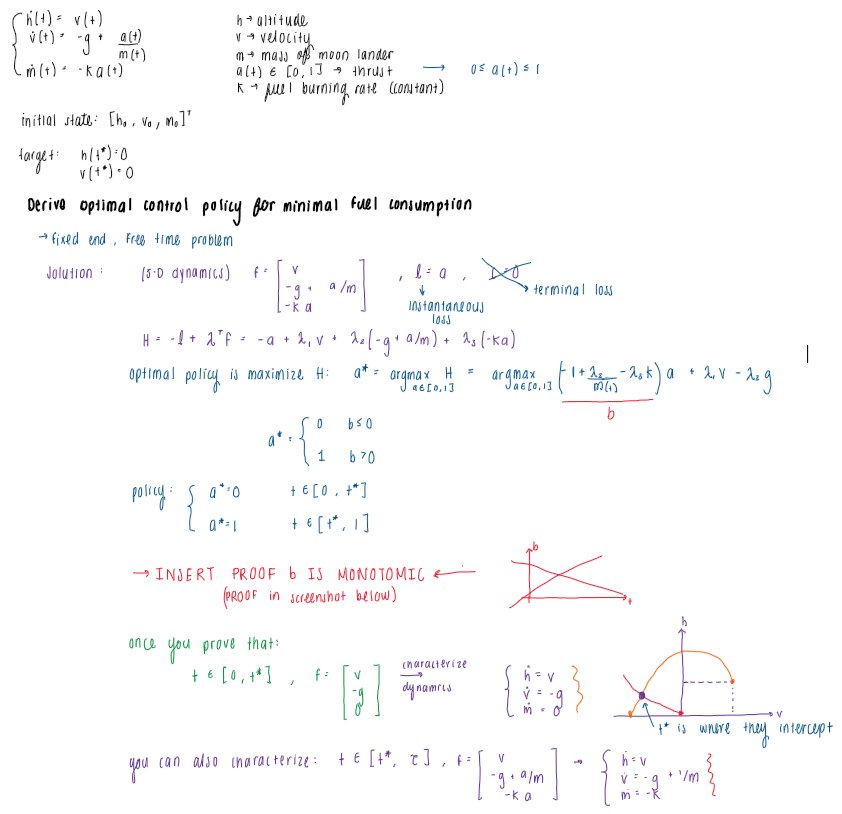

In [1]:
from IPython import display
display.Image("HW5_Q2.png")

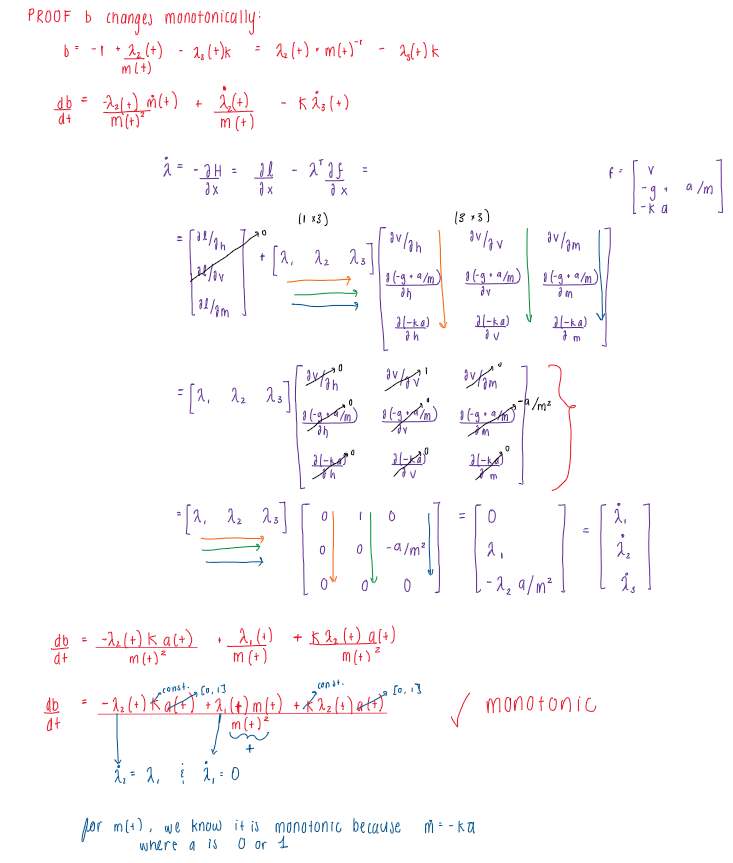

In [2]:
from IPython import display
display.Image("HW5_Q2_Proof.png")